In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df=pd.read_csv('/content/creditcard.csv',on_bad_lines='skip')

In [7]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13909 entries, 0 to 13908
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13909 non-null  int64  
 1   V1      13909 non-null  float64
 2   V2      13909 non-null  float64
 3   V3      13909 non-null  float64
 4   V4      13909 non-null  float64
 5   V5      13909 non-null  float64
 6   V6      13909 non-null  float64
 7   V7      13909 non-null  float64
 8   V8      13909 non-null  float64
 9   V9      13909 non-null  float64
 10  V10     13909 non-null  float64
 11  V11     13909 non-null  float64
 12  V12     13909 non-null  float64
 13  V13     13909 non-null  float64
 14  V14     13909 non-null  float64
 15  V15     13908 non-null  float64
 16  V16     13908 non-null  float64
 17  V17     13908 non-null  float64
 18  V18     13908 non-null  float64
 19  V19     13908 non-null  float64
 20  V20     13907 non-null  float64
 21  V21     13907 non-null  float64
 22

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13909.000000,13909.000000,13909.000000,13909.000000,13909.000000,13909.000000,13909.000000,13909.000000,13909.000000,13909.000000,...,13907.000000,13907.000000,13907.000000,13907.000000,13907.000000,13907.000000,13907.000000,13906.000000,13906.000000,13906.000000
mean,15763.326767,-0.266297,0.177522,0.760282,0.174344,-0.149306,0.103562,-0.047465,-0.017808,0.285723,...,-0.034617,-0.141960,-0.036595,0.019533,0.115933,0.014751,0.013166,0.000039,77.411724,0.002301
std,13569.459624,1.680987,1.430336,1.332574,1.390546,1.317870,1.327998,1.175889,1.428551,1.165694,...,0.916946,0.664078,0.505041,0.595748,0.427886,0.608881,0.406872,0.294928,230.866178,0.047917
min,0.000000,-23.383129,-25.640527,-20.195367,-4.758614,-42.147898,-13.450773,-18.287733,-41.484823,-4.532523,...,-20.262054,-8.527145,-15.144340,-2.836627,-2.640366,-1.338556,-8.260909,-9.617915,0.000000,0.000000
25%,2967.000000,-1.010355,-0.418633,0.259432,-0.720252,-0.743365,-0.675144,-0.540937,-0.174470,-0.436490,...,-0.254610,-0.578360,-0.179704,-0.327141,-0.141781,-0.338871,-0.057412,-0.011154,5.037500,0.000000
50%,9040.000000,-0.355306,0.215728,0.846622,0.200412,-0.188584,-0.178090,-0.012140,0.029748,0.199620,...,-0.096313,-0.130955,-0.049737,0.076277,0.144229,-0.050511,0.010725,0.020918,20.000000,0.000000
75%,30999.000000,1.144387,0.870878,1.494073,1.091925,0.343852,0.486727,0.503722,0.313409,0.960451,...,0.085594,0.292364,0.083224,0.412063,0.388486,0.287473,0.115414,0.079314,69.990000,0.000000
max,32954.000000,1.685314,8.261750,4.101716,7.730844,18.621686,22.529298,36.677268,9.418215,10.392889,...,22.588989,5.805795,13.876221,3.658746,5.525093,41.710000,11.135740,4.860769,7879.420000,1.000000


In [10]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,15770.865936,-0.264493,0.171661,0.771805,0.164554,-0.148378,0.107871,-0.043415,-0.018448,0.289906,...,0.047979,-0.035644,-0.141838,-0.036573,0.019873,0.115956,0.011214,0.012498,-0.000502,77.337136
1.0,12464.343750,-1.010558,2.663692,-4.286573,4.393804,-0.473109,-1.777027,-1.755993,0.498592,-1.635103,...,0.254469,0.399264,-0.185634,-0.047507,-0.135687,0.105795,0.245526,0.303158,0.234383,109.750313


In [13]:
data=df.drop(['Time'],axis=1)

Text(0, 0.5, 'Frequency')

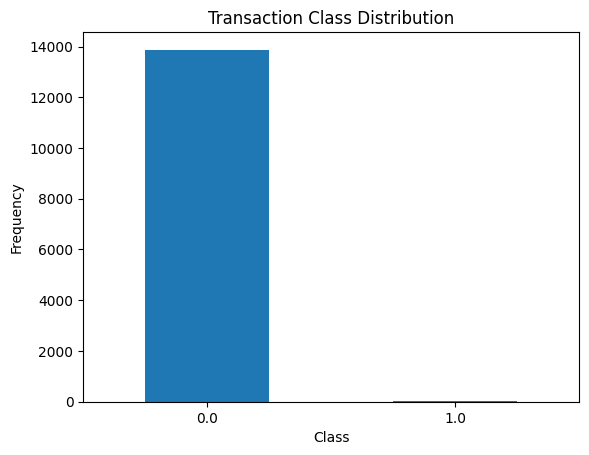

In [12]:
count_classes =pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [14]:
data=df.sample(frac=0.1,random_state=1)
data.shape

(1391, 31)

In [15]:
f=df[df['Class']==1]
f.shape

(32, 31)

In [16]:
n=df[df['Class']==0]
n.shape

(13874, 31)

In [17]:
print(f.Amount.describe())
print(n.Amount.describe())

count      32.000000
mean      109.750313
std       348.110793
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64
count    13874.000000
mean        77.337136
std        230.540518
min          0.000000
25%          5.200000
50%         20.000000
75%         69.990000
max       7879.420000
Name: Amount, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

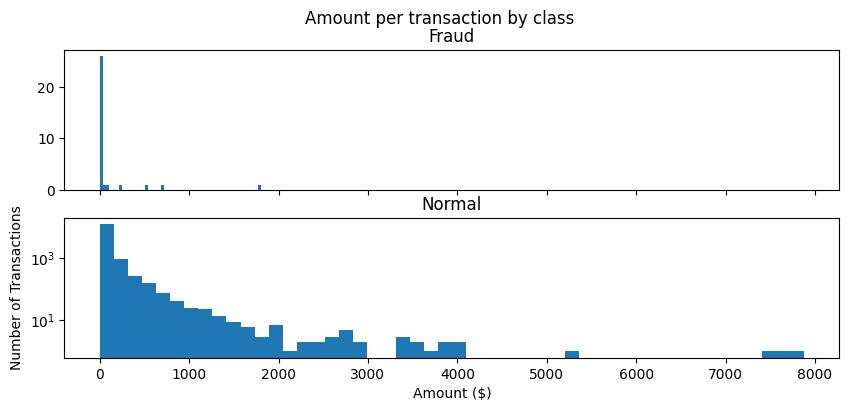

In [20]:

fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(10,4))
fig.suptitle('Amount per transaction by class')
bins=50

ax1.hist(df[df['Class']==1].Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(n.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show

In [21]:
f=df[df['Class']==1]
n=df[df['Class']==0]
f.shape
n.shape

(13874, 31)

In [22]:
f=df[df['Class']==1]
n=df[df['Class']==0]
fr=len(f)
nr=len(n)
print(fr)
print(nr)


32
13874


In [23]:
out_frac=len(f)/len(n)
print(out_frac)
print("Fraud Case :{}".format(fr))
print("Normal Case :{}".format(nr))

0.002306472538561338
Fraud Case :32
Normal Case :13874


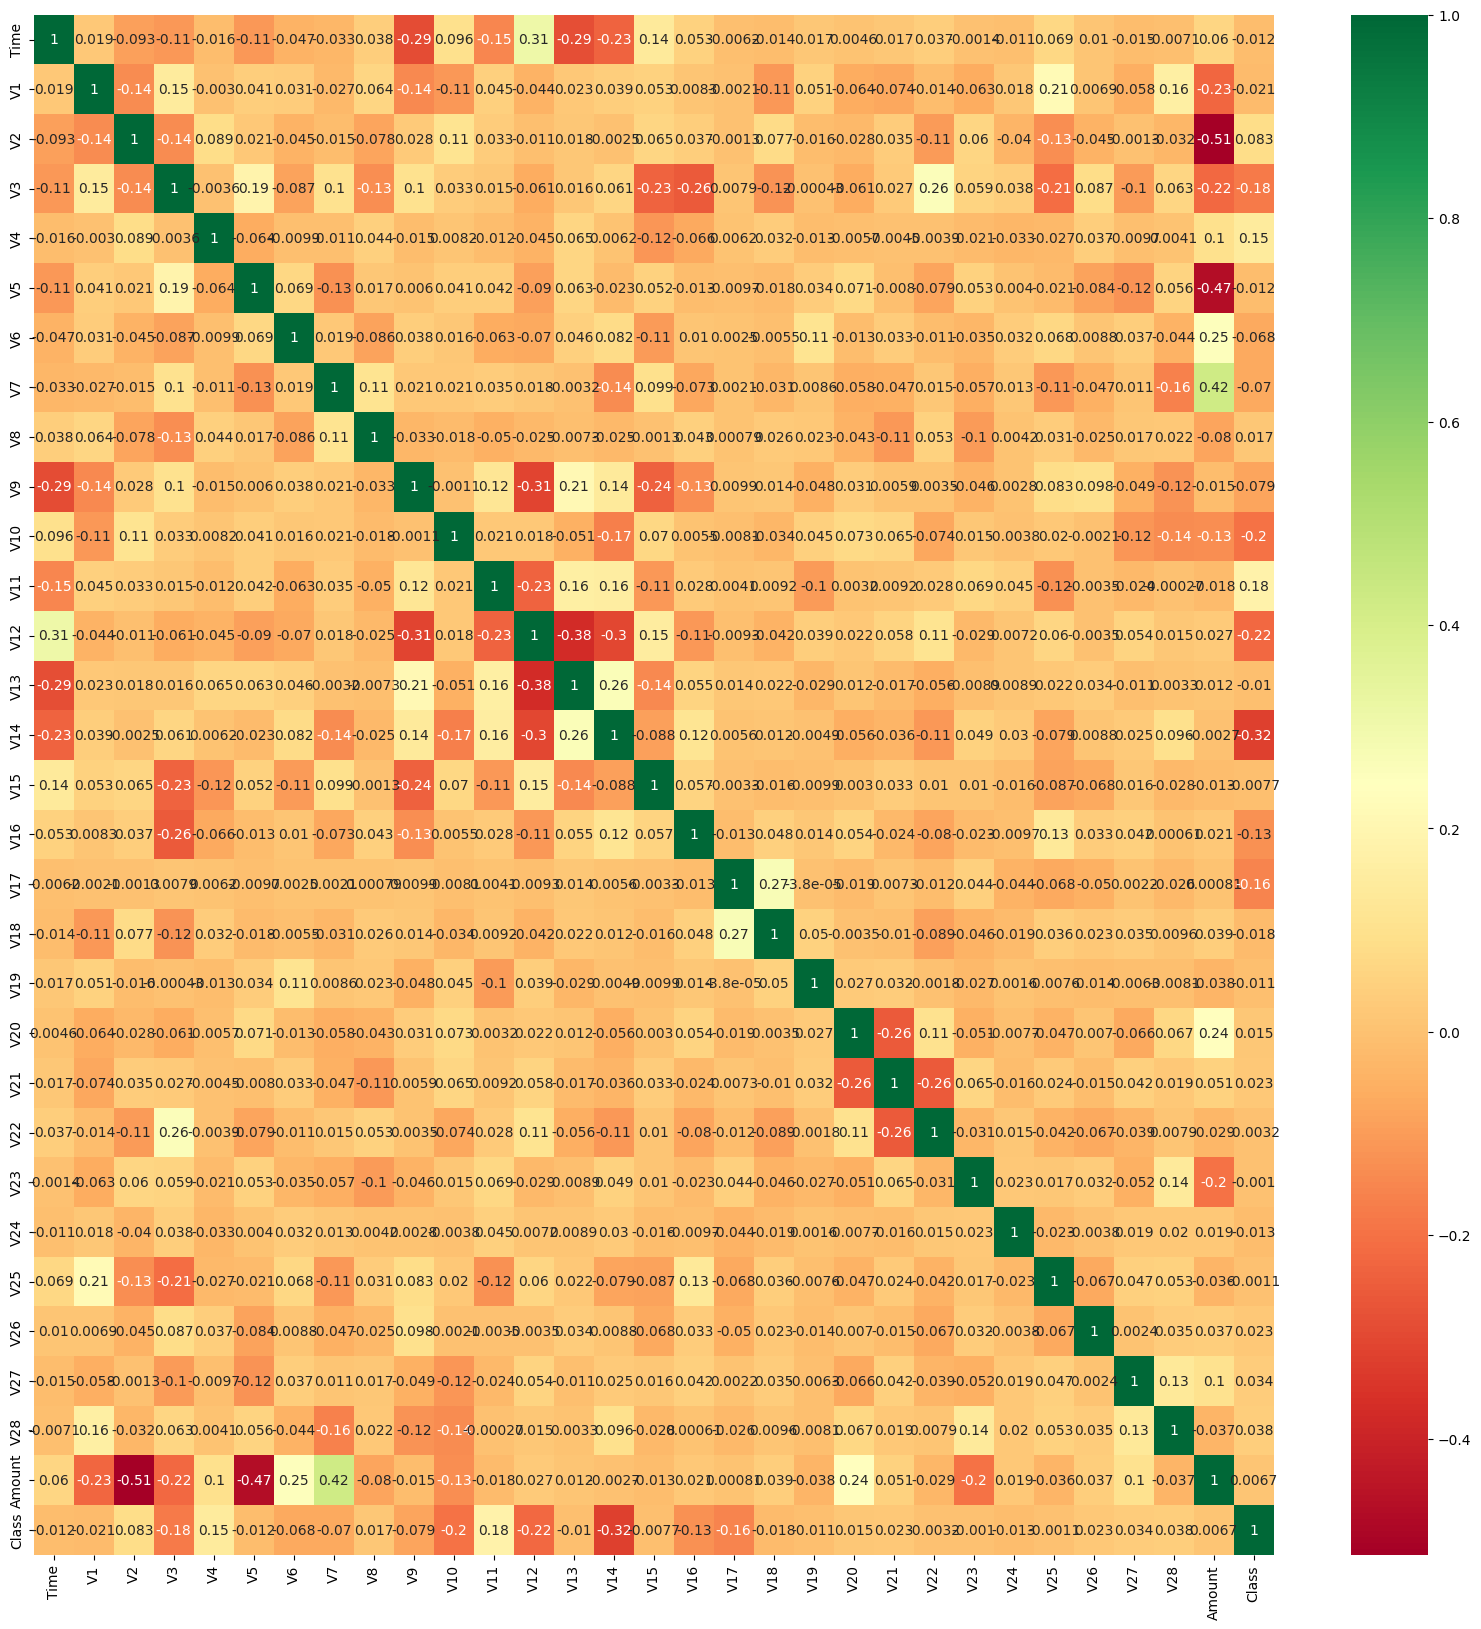

In [24]:
corr=df.corr()
t=corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[t].corr(),annot=True,cmap="RdYlGn")
#

In [35]:
n=n.sample(n=fr,random_state=2)
print(n.shape)

(32, 31)


In [36]:
new=pd.concat([n,f],axis=0)
new.shape

(64, 31)

In [37]:
x=data.drop('Class',axis=1)
y=data['Class']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [40]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)*100
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  100.0


In [43]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [46]:
test_data_accuracy= accuracy_score(x_test_prediction,y_test)*100
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  99.6415770609319
